In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(42)
mu_true = [0, 5]
N = 1000
sigma = 1
x = np.concatenate(
    [np.random.normal(mu_true[0], sigma, N//2), np.random.normal(mu_true[1], sigma, N//2)]
)

In [3]:
def update_phi(x, mu):
    log_p1 = np.log(0.5) + (-0.5 * (x - mu[0]) ** 2)
    log_p2 = np.log(0.5) + (-0.5 * (x - mu[1]) ** 2)
    phi = np.exp(log_p1) / (np.exp(log_p1) + np.exp(log_p2))
    return phi


def update_mu(x, phi):
    mu1 = (N/(N+1)) * np.sum(phi * x) / np.sum(phi)
    mu2 = (N/(N+1)) * np.sum((1 - phi) * x) / np.sum(1 - phi)
    return np.array([mu1, mu2])


def compute_elbo(x, mu, phi):
    elbo = np.sum(
        phi * (np.log(0.5) - 0.5 * (x - mu[0]) ** 2 / (sigma**2))
        + (1 - phi) * (np.log(0.5) - 0.5 * (x - mu[1]) ** 2 / (sigma**2))
    )
    elbo -= np.sum(phi * np.log(phi) + (1 - phi) * np.log(1 - phi))
    return elbo


mu = np.random.rand(2)
phi = np.random.rand(len(x))

phis = [phi]
mus = [mu]
elbos = [compute_elbo(x, mu, phi)]
for _ in range(10):
    phi = update_phi(x, mu)
    mu = update_mu(x, phi)
    phis.append(phi)
    mus.append(mu)
    elbos.append(compute_elbo(x, mu, phi))

Text(0.5, 1.0, 'Synthetic Data Generated from Mixture of Two Gaussian Distributions')

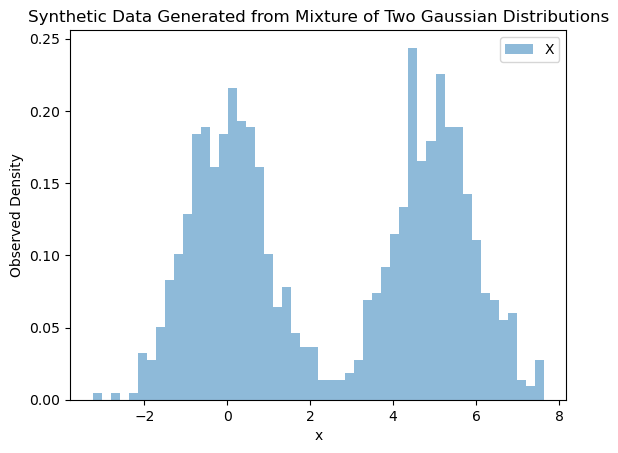

In [4]:
_ = plt.hist(x, bins=50, density=True, alpha=0.5, label='X')
plt.legend()
plt.xlabel('x')
plt.ylabel('Observed Density')
plt.title('Synthetic Data Generated from Mixture of Two Gaussian Distributions')

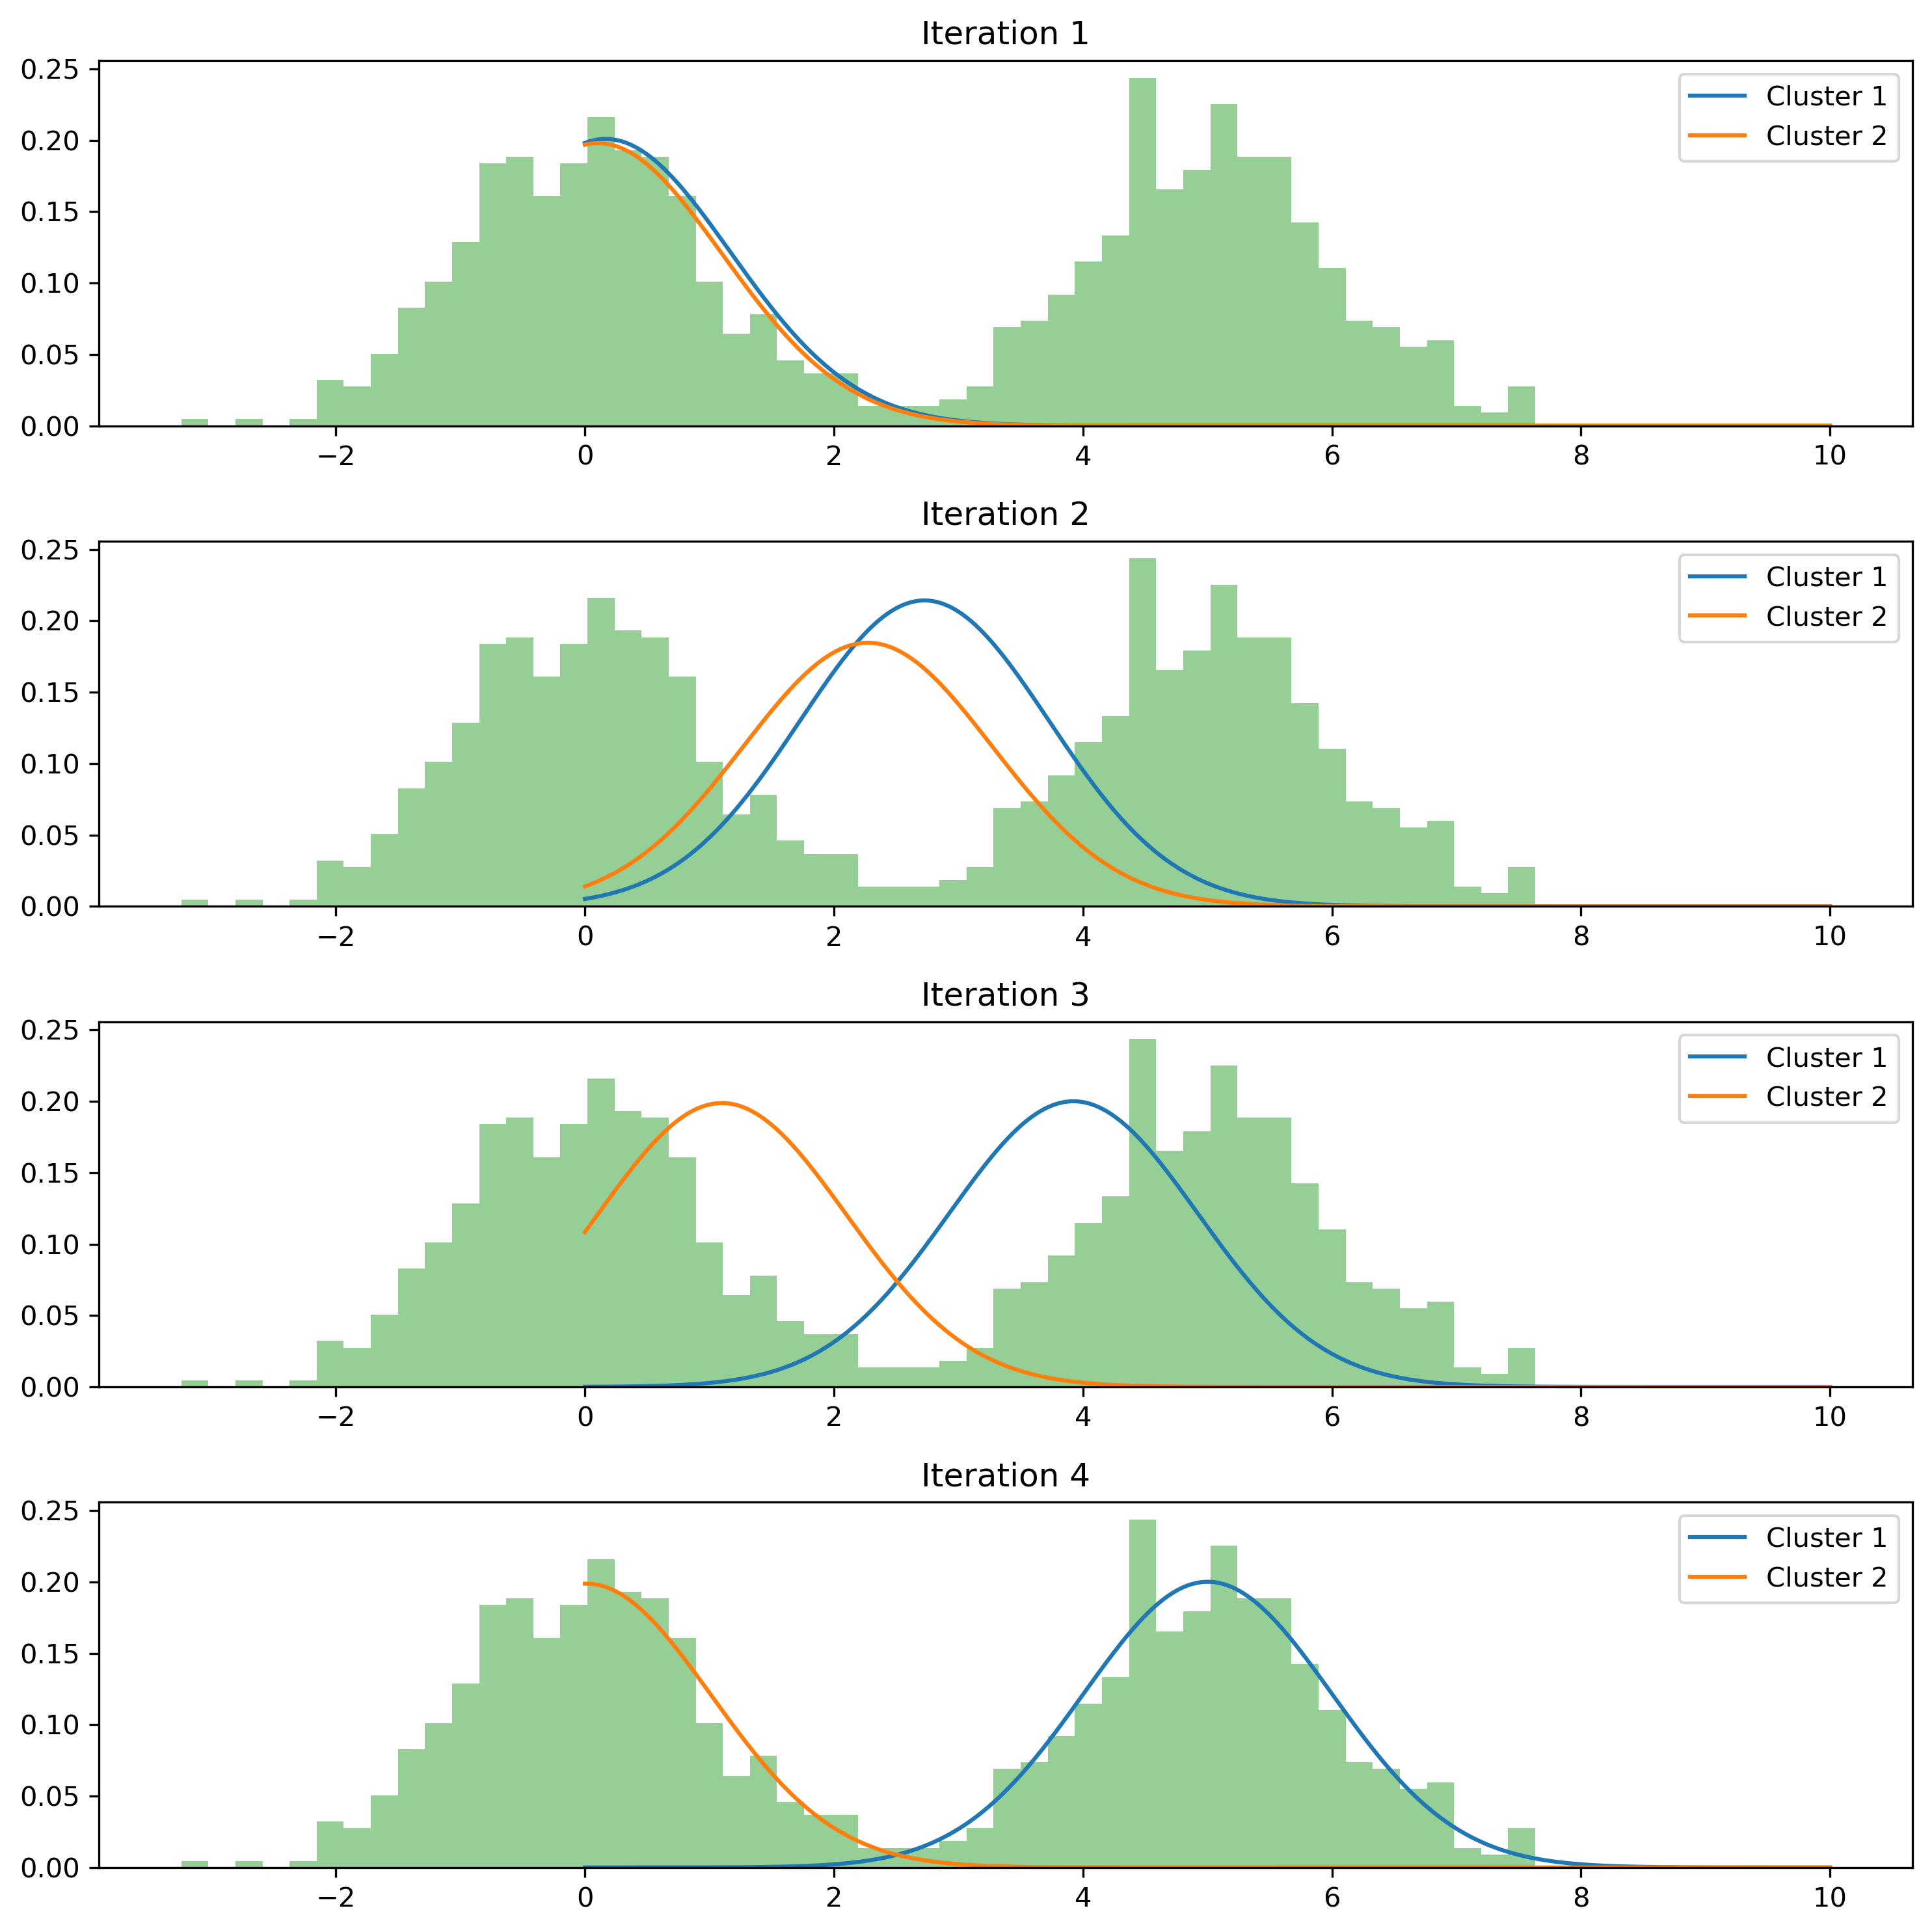

In [5]:
n_iter = 4
fig, axs = plt.subplots(n_iter, 1, figsize=(10, 10), dpi=300)
xs = np.linspace(0, 10, 1000)

for i in range(n_iter):
    p1 = phis[i].mean()
    p2 = 1 - p1
    plt.axes(axs[i])
    plt.plot(xs,norm.pdf(xs, mus[i][0], sigma) * p1, label="Cluster 1")
    plt.plot(xs,norm.pdf(xs, mus[i][1], sigma) * p2, label="Cluster 2")
    axs[i].set_title(f"Iteration {i+1}")
    _ = plt.hist(x, bins=50, density=True, alpha=0.5)
    axs[i].legend()

plt.tight_layout()

Text(0.5, 1.0, 'Log ELBO over Iterations')

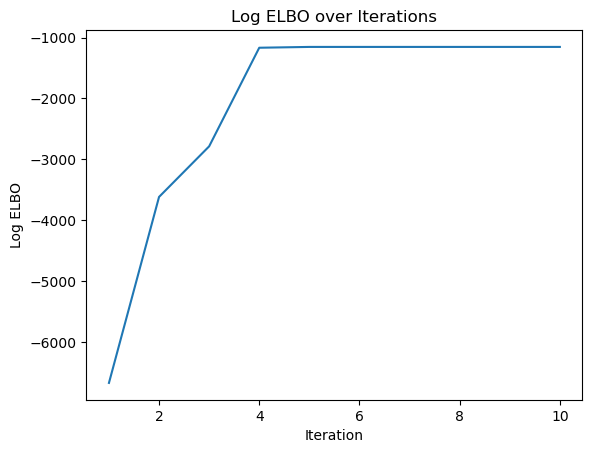

In [6]:
plt.plot(np.arange(1,11,1), elbos[:10])
plt.xlabel("Iteration")
plt.ylabel("Log ELBO")
plt.title("Log ELBO over Iterations")